File 1 

Parametri [ 4.59600000e-03  9.31314664e-08  4.60070171e-04  1.00102743e-07
  8.45527374e+01  4.24980155e+00  3.83163384e+02  1.60811198e-06
 -4.16825494e-02] 

Errori [2.93741811e-05 6.76247521e-10 5.86262358e-07 2.08118854e-10
 1.05840053e+00 1.01461298e-01 2.54583544e+00 4.90531505e-08
 2.21844074e-03] 

Chi quadro ridotto:  3.6132775949356617 

File 2 

Parametri [ 4.59592302e-03  9.34316371e-08  4.63065773e-04  9.90706283e-08
  8.28595802e+01  4.18627946e+00  5.26597449e+02  1.28773934e-06
 -3.22386417e-02] 

Errori [2.99995085e-05 7.46799253e-10 4.66209020e-07 1.78436492e-10
 1.22289442e+00 9.15437113e-02 3.33373606e+00 5.35092786e-08
 2.17969011e-03] 

Chi quadro ridotto:  4.07401687161259 

File 3 

Parametri [ 4.58599539e-03  9.36091945e-08  4.60019971e-04  9.95090375e-08
  8.05224895e+01  3.49811411e+00  1.10195242e+03  7.06642084e-07
 -9.75512543e-03] 

Errori [2.74158790e-05 7.95371977e-10 2.41896454e-07 9.83157653e-11
 1.36914011e+00 5.05697662e-02 5.13538585e+00 4

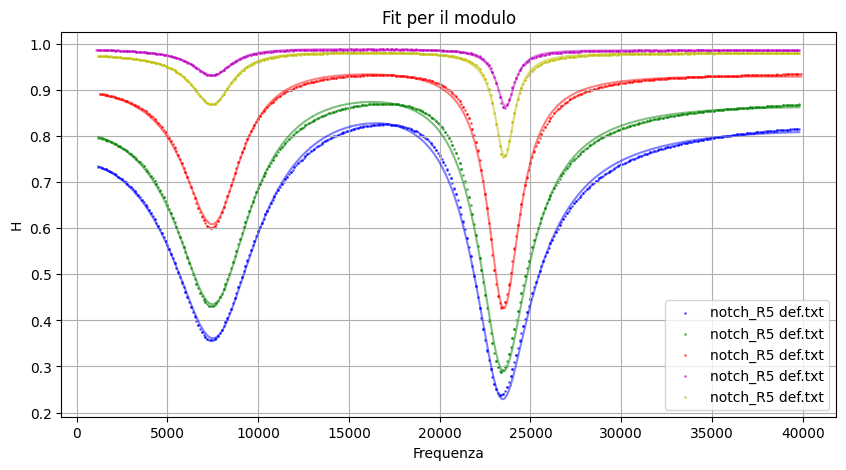

File 1 

Parametri [ 4.59600000e-03  9.31314664e-08  4.60070171e-04  1.00102743e-07
  8.45527374e+01  4.24980155e+00  3.83163384e+02  1.60811198e-06
 -4.16825494e-02] 

Errori [2.93741811e-05 6.76247521e-10 5.86262358e-07 2.08118854e-10
 1.05840053e+00 1.01461298e-01 2.54583544e+00 4.90531505e-08
 2.21844074e-03] 

File 2 

Parametri [ 4.59592302e-03  9.34316371e-08  4.63065773e-04  9.90706283e-08
  8.28595802e+01  4.18627946e+00  5.26597449e+02  1.28773934e-06
 -3.22386417e-02] 

Errori [2.99995085e-05 7.46799253e-10 4.66209020e-07 1.78436492e-10
 1.22289442e+00 9.15437113e-02 3.33373606e+00 5.35092786e-08
 2.17969011e-03] 

File 3 

Parametri [ 4.58599539e-03  9.36091945e-08  4.60019971e-04  9.95090375e-08
  8.05224895e+01  3.49811411e+00  1.10195242e+03  7.06642084e-07
 -9.75512543e-03] 

Errori [2.74158790e-05 7.95371977e-10 2.41896454e-07 9.83157653e-11
 1.36914011e+00 5.05697662e-02 5.13538585e+00 4.03789930e-08
 1.36649822e-03] 

File 4 

Parametri [4.34257721e-03 9.89129480e-08

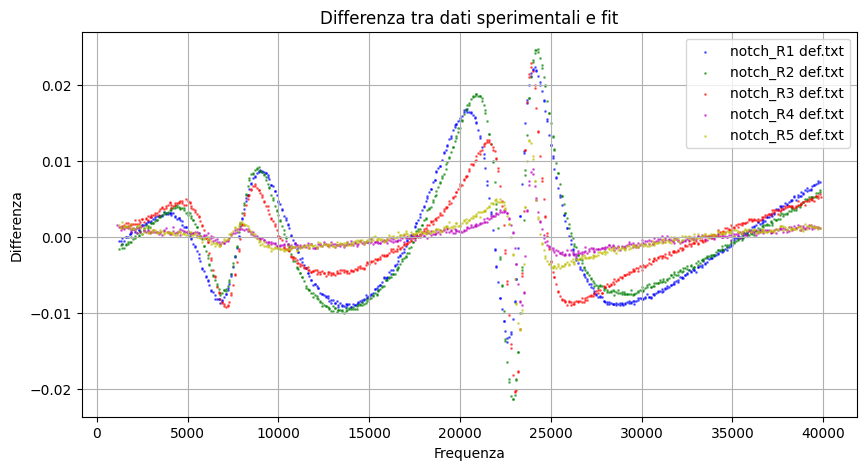

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Dati forniti
L1 = 4.576E-3  #4576
L2 = 481.5E-6 #481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
# R = (329.84, 470.53, 997.90, 9970.9) 

R = (379.84, 520.53, 1057.90, 10020.9, 4737.1) 
# R = (381.84, 522.53, 997.90, 9970.9, 1) 

RL1 = 78.0
RL2 = 2.5

mS = 6.20932558310695e-05 /(180 *np.pi)
qS = -2.6990047849767658 /(180 *np.pi)

mR = 0.00028198409330438157 /(180 *np.pi)
qR = -2.695525201755178 /(180 *np.pi)

# Definizione delle funzioni per il modulo e la parte reale
def module(f, L1, C1, L2, C2, RL1, RL2, R, m, q):
    # Implementazione della funzione di modulo
    W = 2 * np.pi * f
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
    B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
    H = R / np.sqrt(B1**2 + B2**2)
    return H *(R-51.7)/R - (m * f + q)


# Lista per memorizzare i parametri dei fit per ciascun file
params_list_mod = []
cov_list_mod=[]

x_values_list = []
y_values_list = []

y_mod_fit_list = []
errors_fit_list=[]
chi_rid = []

errors= 0.004



# Definizione dei limiti per i parametri del fit
# bounds_list = [
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),
# ]

# ottimale per ora
bounds_list0 = [
    ([L1 - 1E-4, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 100, RL2 - 1, R[0] - 10, mR -1E-4, -5], [L1 + 2E-5, C1 + 2E-8, L2 + 2E-4, C2 + 2E-8, RL1 + 8, RL2 + 1.75, R[0] + 1000, mR +1E-4, 0.5]),
    ([L1 - 1E-4, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 100, RL2 - 1, R[1] - 100, mR -1E-4, -5], [L1 + 2E-5, C1 + 2E-8, L2 + 2E-4, C2 + 2E-8, RL1 + 8, RL2 + 1.75, R[1] + 1000, mR +1E-4, 0.5]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[2] - 100, mR -1E-4, -5], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[2] + 1000, mR +1E-4, 0.5]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[3] - 10000, mR -1E-4, -5], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[3] + 10000, mR +1E-4, 0.5]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[4] - 10000, mR -1E-4, -5], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[4] + 10000, mR +1E-4, 0.5]),
]



# Iterazione attraverso i file e i limiti di resistenza
for file_name, bounds in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], bounds_list0):
    
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, cov_mod= curve_fit(module, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)
    cov_list_mod.append(cov_mod)
    x_values_list.append(x_values)
    y_values_list.append(y_values)
    
for cov in cov_list_mod:
    errors_fit_list.append(np.sqrt(np.diag(cov)))


# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit per il modulo')
plt.xlabel('Frequenza')
plt.ylabel('H')
# plt.xscale('log')





for par, i, color, err , x, y, in zip(params_list_mod, range(5), ['b', 'g', 'r', 'm', 'y'], errors_fit_list, x_values_list, y_values_list ):
    # x_fit = np.linspace(min(x_values), max(x_values), 1000)
    
    y_mod_fit = module(np.array(x_values_list[i]), *par) 
    plt.plot(x, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    y_mod_fit_list.append(y_mod_fit)
    
    plt.scatter(x, y, label=file_name, s=1, color=color, alpha= 0.5)
    
    chi_rid = np.sum(((np.array(y) - np.array(y_mod_fit))/errors)**2)/(len(y)-len(par))
    
    
    print('File', i+1, '\n')
    print('Parametri', par, '\n')
    print('Errori', err, '\n')
    print('Chi quadro ridotto: ', chi_rid, '\n')
    
plt.legend()
plt.grid()
plt.show()   
    

# for file_name, color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], ['b', 'g', 'r', 'm', 'y']):
#     with open(file_name, 'r') as file:
#         lines = file.readlines()
#     x_values = []
#     y_values = []
#     for line in lines:
#         parts = line.split()
#         x_values.append(float(parts[0]))
#         y_values.append(float(parts[1]))
#     plt.scatter(x_values, y_values, label=file_name, s=1, color=color, alpha= 0.5)

for param, err, i in zip(params_list_mod, errors_fit_list, range(5)):
    print('File', i+1, '\n')
    print('Parametri', param, '\n')
    print('Errori', err, '\n')
    
    
plt.figure(figsize=(10, 5))
plt.title('Differenza tra dati sperimentali e fit')
plt.xlabel('Frequenza')
plt.ylabel('Differenza')
#plt.xscale('log')


for file_name, i,  color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], range(5), ['b', 'g', 'r', 'm', 'y']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

        
    print ('\nIterazione', i)    
    print (len(x_values)) 
    print (len(y_values))       
    print (len(y_mod_fit_list[i]))
    print (len(np.array(y_values) - np.array(y_mod_fit_list[i])) )
    
    
    plt.scatter(x_values, np.array(y_values) - np.array(y_mod_fit_list[i]), label=file_name, s=1, color=color, alpha=0.5)

plt.legend()
plt.grid()
plt.show()
   


File 1 

Parametri [4.47600000e-03 9.77971213e-08 4.78546240e-04 9.58898436e-08
 7.56432064e+01 4.24999884e+00 3.94031222e+02] 

Errori [4.15664415e-05 9.74622777e-10 1.16876043e-06 4.05032425e-10
 1.44495368e+00 2.19235678e-01 2.19046509e+00] 

Chi quadro ridotto:  17.637411970803615 

File 2 

Parametri [4.47600000e-03 9.80573374e-08 4.69647438e-04 9.74314338e-08
 7.40895057e+01 4.13935424e+00 5.37285473e+02] 

Errori [3.54213894e-05 8.92575902e-10 7.77805454e-07 2.97936870e-10
 1.32677117e+00 1.58358839e-01 2.60260755e+00] 

Chi quadro ridotto:  12.868239568979472 

File 3 

Parametri [4.25251412e-03 1.01606007e-07 4.60614308e-04 9.93332685e-08
 7.03680466e+01 3.49247089e+00 1.05460513e+03] 

Errori [3.34654553e-05 6.25285346e-10 3.74414174e-07 1.52000850e-10
 6.87924435e-01 7.67405729e-02 4.04180282e+00] 

Chi quadro ridotto:  5.439574930134801 

File 4 

Parametri [3.92067687e-03 1.07671039e-07 4.56070202e-04 9.95249805e-08
 6.80000000e+01 3.50000000e+00 8.60420790e+03] 

Errori [

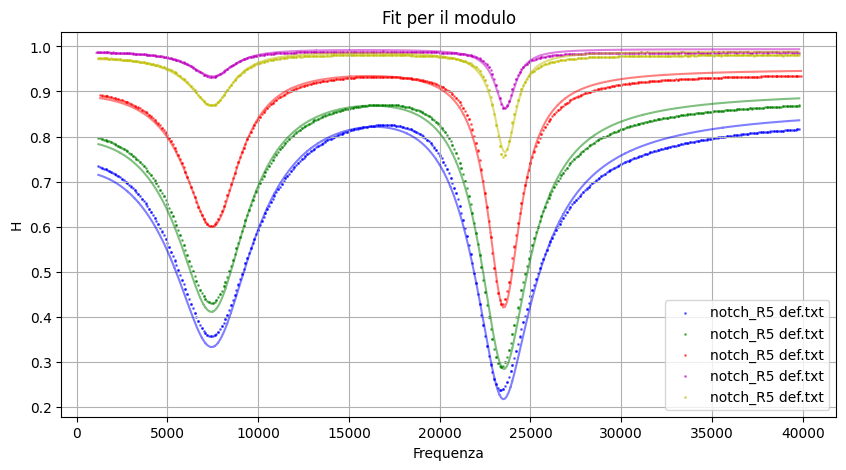

File 1 

Parametri [4.47600000e-03 9.77971213e-08 4.78546240e-04 9.58898436e-08
 7.56432064e+01 4.24999884e+00 3.94031222e+02] 

Errori [4.15664415e-05 9.74622777e-10 1.16876043e-06 4.05032425e-10
 1.44495368e+00 2.19235678e-01 2.19046509e+00] 

File 2 

Parametri [4.47600000e-03 9.80573374e-08 4.69647438e-04 9.74314338e-08
 7.40895057e+01 4.13935424e+00 5.37285473e+02] 

Errori [3.54213894e-05 8.92575902e-10 7.77805454e-07 2.97936870e-10
 1.32677117e+00 1.58358839e-01 2.60260755e+00] 

File 3 

Parametri [4.25251412e-03 1.01606007e-07 4.60614308e-04 9.93332685e-08
 7.03680466e+01 3.49247089e+00 1.05460513e+03] 

Errori [3.34654553e-05 6.25285346e-10 3.74414174e-07 1.52000850e-10
 6.87924435e-01 7.67405729e-02 4.04180282e+00] 

File 4 

Parametri [3.92067687e-03 1.07671039e-07 4.56070202e-04 9.95249805e-08
 6.80000000e+01 3.50000000e+00 8.60420790e+03] 

Errori [7.88450870e-05 1.64128388e-09 4.00283771e-07 2.12251981e-10
 1.64618236e+00 9.17064550e-02 8.88032861e+01] 

File 5 

Paramet

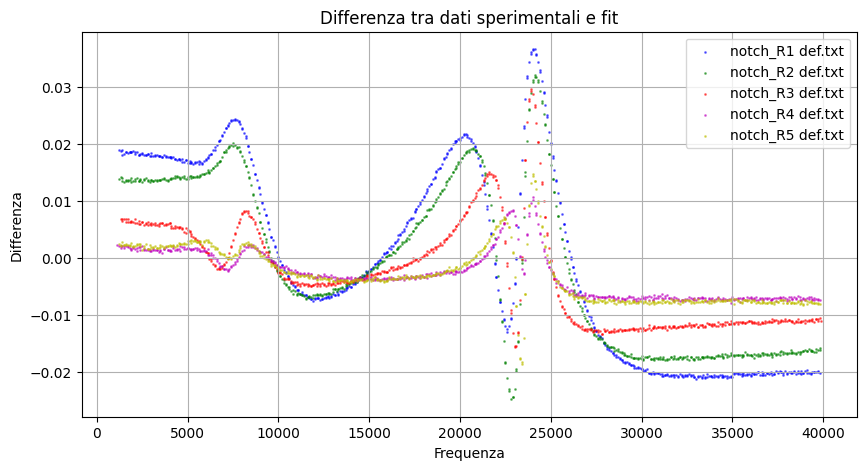

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Dati forniti
L1 = 4.576E-3  #4576
L2 = 481.5E-6 #481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
# R = (329.84, 470.53, 997.90, 9970.9) 

R = (379.84, 520.53, 1057.90, 10020.9, 4737.1) 
# R = (381.84, 522.53, 997.90, 9970.9, 1) 

RL1 = 78.0
RL2 = 2.5

mS = 6.20932558310695e-05 /(180 *np.pi)
qS = -2.6990047849767658 /(180 *np.pi)

mR = 0.00028198409330438157 /(180 *np.pi)
qR = -2.695525201755178 /(180 *np.pi)

# Definizione delle funzioni per il modulo e la parte reale
def module(f, L1, C1, L2, C2, RL1, RL2, R):
    # Implementazione della funzione di modulo
    W = 2 * np.pi * f
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    B1 = R + RL1 / (A1**2 + D1**2) + RL2 / (A2**2 + D2**2)
    B2 = (A1 * W * L1 - RL1 * D1) / (A1**2 + D1**2) + (A2 * W * L2 - RL2 * D2) / (A2**2 + D2**2)
    H = R / np.sqrt(B1**2 + B2**2)
    return H *(R-51.7)/R 


# Lista per memorizzare i parametri dei fit per ciascun file
params_list_mod = []
cov_list_mod=[]

x_values_list = []
y_values_list = []

y_mod_fit_list = []
errors_fit_list=[]
chi_rid = []

errors= 0.004



# Definizione dei limiti per i parametri del fit
# bounds_list = [
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[0] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[0] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[1] - 10], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[1] + 10]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[2] - 100], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[2] + 100]),
#     ([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R[3] - 1000], [L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R[3] + 1000]),
# ]

# ottimale per ora
bounds_list0 = [
    ([L1 - 1E-4, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 100, RL2 - 1, R[0] - 10], [L1 + 2E-5, C1 + 2E-8, L2 + 2E-4, C2 + 2E-8, RL1 + 8, RL2 + 1.75, R[0] + 1000]),
    ([L1 - 1E-4, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 100, RL2 - 1, R[1] - 100], [L1 + 2E-5, C1 + 2E-8, L2 + 2E-4, C2 + 2E-8, RL1 + 8, RL2 + 1.75, R[1] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[2] - 100], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[2] + 1000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[3] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[3] + 10000]),
    ([L1 - 1E-3, C1 - 1E-8, L2 - 1E-4, C2 - 1E-8, RL1 - 10, RL2 - 1, R[4] - 10000], [L1 + 1E-5, C1 + 1E-8, L2 + 1E-4, C2 + 1E-8, RL1 + 10, RL2 + 1, R[4] + 10000]),
]



# Iterazione attraverso i file e i limiti di resistenza
for file_name, bounds in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], bounds_list0):
    
    # Apertura del file in modalità di lettura
    with open(file_name, 'r') as file:
        # Lettura di tutte le righe del file
        lines = file.readlines()

    # Inizializzazione delle liste per memorizzare i dati
    x_values = []
    y_values = []

    # Iterazione attraverso le righe ed estrazione dei dati
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

    # Esecuzione del fit per il modulo
    params_mod, cov_mod= curve_fit(module, x_values, y_values, bounds=bounds, maxfev=70000)
    params_list_mod.append(params_mod)
    cov_list_mod.append(cov_mod)
    x_values_list.append(x_values)
    y_values_list.append(y_values)
    
for cov in cov_list_mod:
    errors_fit_list.append(np.sqrt(np.diag(cov)))


# Plot dei dati sperimentali e dei fit per il modulo
plt.figure(figsize=(10, 5))
plt.title('Fit per il modulo')
plt.xlabel('Frequenza')
plt.ylabel('H')
# plt.xscale('log')





for par, i, color, err , x, y, in zip(params_list_mod, range(5), ['b', 'g', 'r', 'm', 'y'], errors_fit_list, x_values_list, y_values_list ):
    # x_fit = np.linspace(min(x_values), max(x_values), 1000)
    
    y_mod_fit = module(np.array(x_values_list[i]), *par) 
    plt.plot(x, y_mod_fit, linestyle='-', color=color, alpha=0.5)
    y_mod_fit_list.append(y_mod_fit)
    
    plt.scatter(x, y, label=file_name, s=1, color=color, alpha= 0.5)
    
    chi_rid = np.sum(((np.array(y) - np.array(y_mod_fit))/errors)**2)/(len(y)-len(par))
    
    
    print('File', i+1, '\n')
    print('Parametri', par, '\n')
    print('Errori', err, '\n')
    print('Chi quadro ridotto: ', chi_rid, '\n')
    
plt.legend()
plt.grid()
plt.show()   
    

# for file_name, color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], ['b', 'g', 'r', 'm', 'y']):
#     with open(file_name, 'r') as file:
#         lines = file.readlines()
#     x_values = []
#     y_values = []
#     for line in lines:
#         parts = line.split()
#         x_values.append(float(parts[0]))
#         y_values.append(float(parts[1]))
#     plt.scatter(x_values, y_values, label=file_name, s=1, color=color, alpha= 0.5)

for param, err, i in zip(params_list_mod, errors_fit_list, range(5)):
    print('File', i+1, '\n')
    print('Parametri', param, '\n')
    print('Errori', err, '\n')
    
    
plt.figure(figsize=(10, 5))
plt.title('Differenza tra dati sperimentali e fit')
plt.xlabel('Frequenza')
plt.ylabel('Differenza')
#plt.xscale('log')


for file_name, i,  color in zip(['notch_R1 def.txt', 'notch_R2 def.txt', 'notch_R3 def.txt', 'notch_R4 def.txt', 'notch_R5 def.txt'], range(5), ['b', 'g', 'r', 'm', 'y']):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    x_values = []
    y_values = []
    for line in lines:
        parts = line.split()
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

        
    print ('\nIterazione', i)    
    print (len(x_values)) 
    print (len(y_values))       
    print (len(y_mod_fit_list[i]))
    print (len(np.array(y_values) - np.array(y_mod_fit_list[i])) )
    
    
    plt.scatter(x_values, np.array(y_values) - np.array(y_mod_fit_list[i]), label=file_name, s=1, color=color, alpha=0.5)

plt.legend()
plt.grid()
plt.show()
   
